ENGI-5631-FA Mid-Term Assignment, Jared Mercier
--------------



Electrocardiography (ECG) is the main signal processing technique used for diagnosing heart disease. ECG's can be used to analyze the patient’s heart rate, which can determine if the patient is experiencing arrhythmia, indicating cardiovascular issues. An ECG signal representing one cardiac cycle consists of a five element complex, known as: P, Q, R, S, T waves. Intervals between the neighboring segments represent the cycle of depolarization or polarization of the cardiac cells. Each wave and wave interval contain specific characteristics. For example, a P wave usually has a duration between 0.06 - 0.12 seconds (17Hz), a QRS complex or interval has a duration of 0.06 to 0.10 seconds (12.5Hz) [2]. There are many methods to determine the heart rate, a common method is measuring the interval duration between the R waves and dividing it with 60. ECG signals typically contain a bandwidth from 0.05Hz - 100Hz.  

ECG machines consist of a series of electrodes placed on the chest and limbs to measure the electrical activity from the heart. The generation and transmission of the electrical impulses is produced from the hearts cardiac cells. The electrodes then act as the transducer for the data acquisition stage as they convert the impulses into an electrical signal. The voltage level measured from the electrode will be in the microvolt range, therefore further analog signal conditioning will then proceed. An example of an analog signal conditioning stage is the following: instrumentation amplifier, low, high and notch filters respectively [1]. The analog signal will then be applied to an analog to digital converter (ADC) for further signal conditioning and feature extraction in the digital domain

Once the signal has been sampled and quantized, the signal conditioning stage will occur for further analysis. The signal conditioning stage regularly consists of a discrete Fourier transform and digital filtering. A discrete Fourier transform will display peaks at specific frequencies, which provide a foundation for the filtering process. Since ECG signals have frequencies up to 100Hz, any frequency component higher than this is regarded as useless. Therefore, low pass filters are implemented with a cutoff frequency of 100Hz. This process will remove high frequency noise components and reduce the signal to a smaller dimension. Notch filters are also implemented to remove the 60Hz power line noise. Once the signal has been conditioned, the feature extraction stage will occur. Methods for feature extraction help determine signs of cardiac disease. Such methods used are wavelet transforms, Hilbert transform, thresholding [3].


Once the signal has been analyzed from the feature extraction techniques previously stated, hypothesis testing will occur. A typical hypothesis test is determining if the patient has a low or high heart beat provided from the results of the feature extraction process. This information is critical for diagnosing the patient and determining if any diseases are present.

Specification 4
--------------



Total samples: 43081
Sample frequency of 750Hz, with 12-bit resolution
Maximum frequency component of the original signal is 375Hz
Total sample time is: 57.441 seconds


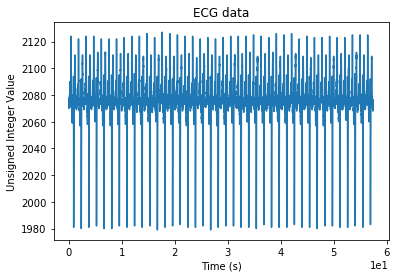

In [62]:
%matplotlib inline

import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from __future__ import division
from scipy.signal import butter, lfilter
from scipy.signal import freqz
from scipy import signal
from IPython.display import Image

#Open the dat file and plot the signal
data = open('aami3a.dat','rb')  
Signal = np.fromfile(data,count=-1,dtype=np.uint16)
txt=str(len(Signal))
txt2=str(round((len(Signal)*(1/750)),3))
print('Total samples: '+txt)
print('Sample frequency of 750Hz, with 12-bit resolution')
print('Maximum frequency component of the original signal is 375Hz')
print('Total sample time is: '+txt2+' seconds')
x=np.arange(0,43081/750.,1/750.)
plt.plot(x,Signal[0:43081])
plt.title('ECG data')
plt.xlabel('Time (s)')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

Specification 5
--------------

Assume 80 beats/min, which is about: $$\frac{80}{60} = 1.33 \frac{beats}{sec}$$ 

And five beats is approximately: $$5 * 1.33  = 6.665 sec$$ 

With a sample period of: $$ Ts = \frac{1}{750} = 1.333ms$$   

There should be: $$ \frac{6.665s}{1.333ms} = 5000 $$ 5000 samples to plot 5 beats 

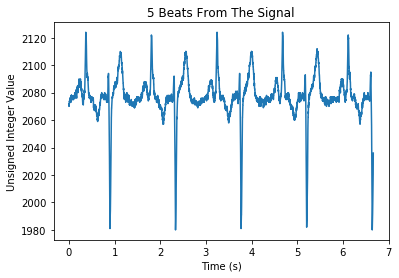

In [63]:
#Plots 5000 samples from the ECG file.
x=np.arange(0,5000/750.,1/750.)
plt.plot(x,Signal[0:5000])
plt.title('5 Beats From The Signal')
plt.xlabel('Time (s)')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

Specification 6
--------------

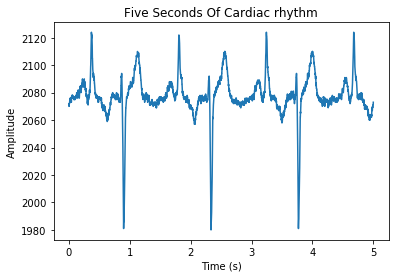

In [64]:
# PLot a zoom-in of the signal where 5 cardiac cycles can be observed considering this
# person has a cardiac cycle of 60 beats/minute. 1 beat/second (Zoom in on five seconds)
x=np.arange(0,43081/750.,1/750.)
#zoom in on five seconds
inx=np.where(x>5)  
inx=inx[0]
plt.plot(x[:inx[0]], Signal[:inx[0]])
plt.title('Five Seconds Of Cardiac rhythm')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

Specification 7
--------------


From observing the plot above, the individual has a lower heart rate. This conclusion is from assuming the individual has a heart rate of 60beats/min and zooming in on five seconds to view 5 beats, this assumption does not hold because the amount of displayed beats is not 5. The number of beats in a 5 second period is roughly 3.75. Therefore you can conclude the individual has a lower heart rate.

Specification 8
--------------

To estimate the heart rate, every 10 seconds the total amount of R waves will be counted and an average will be performed.
Since there is only 57 seconds of the signal, the first 50 seconds will be averaged. The amount of samples in a 10 second period is the following.

 $$ Samples =  \frac{10}{1/750} = 7500$$ 


5 different for loops will be used, and if the signal is above 2117 this will indicate a R wave has occurred.

In [65]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0

for x in range(0,7500):
        if Signal[x] >= 2117:
            count1 = count1 + 1
count1=count1/10
for x in range(7500,15000):
        if Signal[x] >= 2117:
            count2 = count2 + 1
count2=count2/10

for x in range(15000,22500):
        if Signal[x] >= 2117:
              count3 = count3 + 1
count3=count3/10

for x in range(22500,30000):
        if Signal[x] >= 2117:
            count4 = count4 + 1
count4=count4/10

for x in range(30000,37500):
        if Signal[x] >= 2117:
            count5 = count5 + 1     
count5=count5/10          

heart_count = count1+count2+count3+count4+count5
heart_rate = (heart_count / 5)*6
heart_rate = str(round(heart_rate,0))
print('The estimated heart rate of the individual is: '+heart_rate+' beats/min')

The estimated heart rate of the individual is: 46.0 beats/min


Specification 9
--------------


DFT OF THE SIGNAL


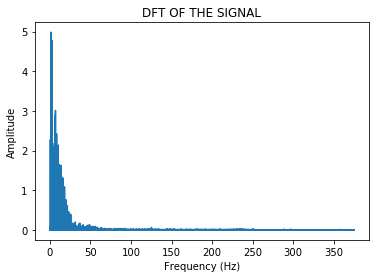

In [66]:
Line=Signal[:43081]
dataF=Line-np.mean(Line)
f=np.arange(0,750/2.,750/43081.)
Y=np.fft.fft(dataF)
L=len(dataF)
ECG_FFT=abs(Y)/L
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('DFT OF THE SIGNAL')
plt.plot(f, ECG_FFT[:21541])
print('DFT OF THE SIGNAL')

Specification 10
--------------


Frequency with maximum amplitude is: 1.393Hz with a peak of: 4.982


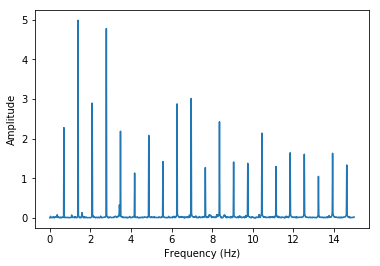

In [67]:
# From observing the graph above, the max peak value is located somewhere between 0 - 10Hz. Will zoom
# into the range of 0 - 10Hz.
inx=np.where(f>15)
inx=inx[0]
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.plot(f[0:inx[0]], ECG_FFT[0:inx[0]])
# After zooming the max amplitude component is between 0 - 2.5Hz and contains a value of approximately 5. 
# Use threshold of 4.75
# Step size (750/4308) * 2.5 = 143 > choose 150 for loop range
threshold = 4.75
for i in range (0,150):
    if(ECG_FFT[i]) > threshold:
        x = i
X = (750/43081)*x       
freq_m =str(round(X,3))
max_peak = str(round(np.max(ECG_FFT),3))
print('Frequency with maximum amplitude is: '+freq_m+'Hz with a peak of: '+max_peak)


Specification 11
--------------

To determine the heart rate, the highest peak is analyzed. Since the frequency with the highest peak is at 1.39Hz, this would indicate a heart rate of:   $$ Heart rate  =  \frac{60}{1.393} = 43.0 \frac{beats}{minute}$$ 

Specification 12
--------------



The peaks observed represent the occurring function (physiology) of the heart. For example, there is a noticable peaks between 10-17Hz. One of these peaks is most likely the QRS complex, since the interval is between 0.06-0.1s. Another example is at 6.25Hz there is a large peak present. This most likely represents the T wave since it has a duration of 0.160ms. The heart rate is determined from observing the peaks in the frequency range of approxmately 0.6-1.5Hz. Then from within this range, the frequency with the largest peak will indicate the heartbeat. 



Specification 13
--------------

Depending on the type of filter, yes affecting the amplitude would cause a big problem. 


Specification 14/15
--------------

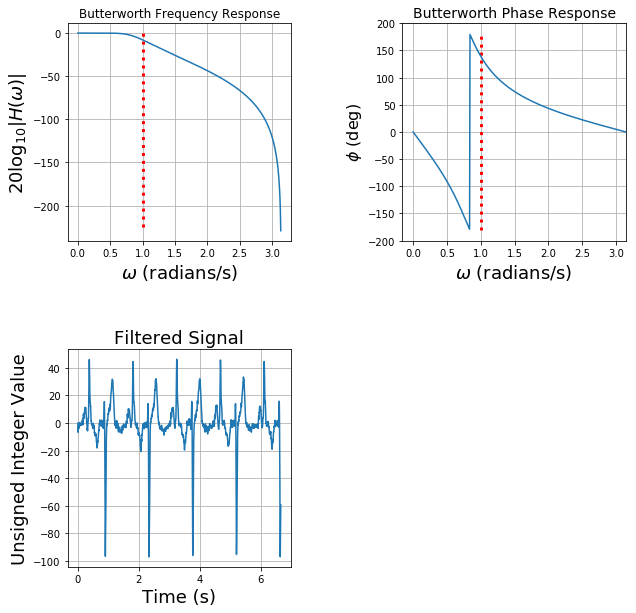

In [68]:
%matplotlib inline

from matplotlib import gridspec

fig=plt.figure()
fig.set_size_inches((10,10))
gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)
ax = fig.add_subplot(plt.subplot(gs[0,0]))


#Sampling frequency and low cut frequency in Hz. 
fs = 750.0
lowcut = 100.0
nyq = 0.5 * fs
low = lowcut / nyq

#DEFINE THE FILTER
b, a = signal.butter(4, low, btype='lowpass', analog=False)
w, h = signal.freqz(b, a)

#PLOT THE MAGNITUDE RESPONSE OF 4TH ORDER BUTTERWORTH FILTER
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.plot(w,20*np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_title('Butterworth Frequency Response',fontsize=12)
ax.set_xlabel(r"$\omega$ (radians/s)",fontsize=18)
ax.vlines(1,-225,0,linestyles=':',color='r',lw=3.)
ax.grid()

#PLOT THE PHASE RESPONSE OF 4TH ORDER BUTTERWORTH FILTER
ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(w,np.angle(h)/np.pi*180)
ax.set_title('Butterworth Phase Response',fontsize=14)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-200,ymax=200)
ax.vlines(1,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()


#OUTPUT RESPONSE (5 BEATS) OF THE SIGNAL AFTER APPLYING FILTER
ax = fig.add_subplot(plt.subplot(gs[1,0]))
ax.set_title('Filtered Signal',fontsize=18)
plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Unsigned Integer Value',fontsize=18)
input_sig = Signal[0:5000]-np.mean(Signal[0:5000])
x=np.arange(0,5000/750.,1/750.)
output_sig = signal.lfilter(b,a,input_sig)
ax.plot(x,output_sig)
ax.grid()

Specification 16
--------------

 DFT of the filtered signal contains a total summed amplitude peaks of: 114.862162175
 DFT of the unfiltered signal contains a total summed amplitude peaks of: 158.9471916


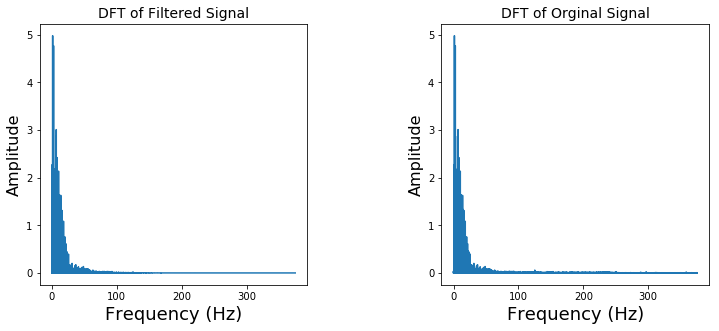

In [69]:
fig=plt.figure()
fig.set_size_inches((12,12))
gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)


total1 = 0
total2 = 0


input_sig = Signal[0:43081]-np.mean(Signal[0:43081])
output_sig_T = signal.lfilter(b,a,input_sig)
dataF=output_sig_T-np.mean(output_sig_T)
f=np.arange(0,750/2.,750/43081.)
Y=np.fft.fft(dataF)
L=len(dataF)
ECG_Filtered=abs(Y)/L
for x in range (0,21541):
    total1 = ECG_Filtered[x]+total1
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.plot(f, ECG_Filtered[0:21541])
ax.set_title('DFT of Filtered Signal',fontsize=14)
ax.set_xlabel(r'Frequency (Hz)',fontsize=18)
ax.set_ylabel(r"Amplitude",fontsize=16)
Line=Signal[:43081]
dataF=Line-np.mean(Line)
f=np.arange(0,750/2.,750/43081.)
Y=np.fft.fft(dataF)
L=len(dataF)
ECG_FFT=abs(Y)/L
for x in range (0,21541):
    total2 = ECG_FFT[x]+total2

ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(f, ECG_FFT[0:21541])
ax.set_title('DFT of Orginal Signal',fontsize=14)
ax.set_xlabel(r'Frequency (Hz)',fontsize=18)
ax.set_ylabel(r"Amplitude",fontsize=16)
txt1 = str(total1)
txt2 = str(total2)

print(' DFT of the filtered signal contains a total summed amplitude peaks of: '+txt1)
print(' DFT of the unfiltered signal contains a total summed amplitude peaks of: '+txt2)

Specification 17
--------------

The effects of applying the filter decreased the overall amplitude of the signal, and smoothed out the components above 100Hz. This result is expected since the filter had a cutoff frequency of 100Hz. The following code below provides more insight into the filters operation by examining the overall amplitudes from 0-100Hz, and the 100-350Hz. Since the step size if 750/43081, the range from 0-100Hz is obtained by:
    $$ \frac{100}{750/43081} = 5744$$
    
Since the filter did not effect the bandwidth of 0-100Hz of the signal, the interpretation of the heart rate is not effected. The critical frequnecies for determing the heart rate for this particular signal is from 0-2Hz, which were not disturbed by the filter.


In [70]:
total1 = 0
total2 = 0
total3 = 0
total4 = 0
#Examing overall amplitudes from 0-100Hz
for x in range (0,5744):
    total1 = ECG_Filtered[x]+total1    
for x in range (0,5744):
    total2 = ECG_FFT[x]+total2
diff = str(total2 - total1)
total1 = str(total1)
total2 = str(total2)

print('Overall amplitude from 0-100Hz for the filtered signal is: ' +total1)    
print('Overall amplitude from 0-100Hz for the unfiltered signal is: ' +total2)
print('With a difference of: '+diff)


#Examing overall amplitudes from 100-375Hz
for x in range (5744,21541):
    total3 = ECG_Filtered[x]+total3    
for x in range (5744,21541):
    total4 = ECG_FFT[x]+total4

diff1 = str(total4 - total3)
total3 = str(total3)
total4 = str(total4)

print('\nOverall amplitude from 100-375Hz for the filtered signal is: ' +total3)    
print('Overall amplitude from 100-375Hz for the unfiltered signal is: ' +total4)
print('With a difference of: '+diff1)

print('\nIndicating the filtered removed values above 100Hz')

Overall amplitude from 0-100Hz for the filtered signal is: 109.630283859
Overall amplitude from 0-100Hz for the unfiltered signal is: 110.606010547
With a difference of: 0.975726688153

Overall amplitude from 100-375Hz for the filtered signal is: 5.23187831593
Overall amplitude from 100-375Hz for the unfiltered signal is: 48.3411810536
With a difference of: 43.1093027377

Indicating the filtered removed values above 100Hz


Biblography
---------------



* [1] S. Rafiq, A. H. M. Z. Alam and M. R. Islam, "Development of ECG home monitoring system," 2017 IEEE Regional Symposium on Micro and Nanoelectronics (RSM), Batu Ferringhi, Penang, Malaysia, 2017, pp. 80-83. doi: 10.1109/RSM.2017.8069119


* [2] http://www.theheartcheck.com/documents/ECG%20Interpretation%20Made%20Incredibly%20Easy!%20(5th%20edition).pdf


* [3] Qibin Zhao and Liqing Zhang, "ECG Feature Extraction and Classification Using Wavelet Transform and Support Vector Machines," 2005 International Conference on Neural Networks and Brain, Beijing, 2005, pp. 1089-1092.


* [4] http://www.meddean.luc.edu/lumen/meded/medicine/skills/ekg/les1prnt.htm


* [5] http://www.analog.com/en/analog-dialogue/articles/ecg-front-end-design-simplified.html


* [6] Chia-Hung Lin, Frequency-domain features for ECG beat discrimination using grey relational analysis-based classifier, In Computers & Mathematics with Applications, Volume 55, Issue 4, 2008, Pages 680-690, ISSN 0898-1221


